In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml2.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 228)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Columns: 228 entries, avgAnnCount to POPLOSS00
dtypes: bool(66), float64(123), int64(39)
memory usage: 4.0+ MB


In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_ACRESPTH07_isnull,BERRY_FARMS07_isnull,BERRY_ACRES07_isnull,BERRY_ACRESPTH07_isnull,SLHOUSE07_isnull,GHVEG_FARMS07_isnull,GHVEG_SQFT07_isnull,GHVEG_SQFTPTH07_isnull,FOODHUB12_isnull,CSA07_isnull,AGRITRSM_OPS07_isnull,AGRITRSM_RCT07_isnull,FARM_TO_SCHOOL_isnull,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PCT_OBESE_CHILD08_isnull,PCT_OBESE_CHILD11_isnull,PCH_OBESE_CHILD_08_11_isnull,PCT_HSPA09_isnull,PCH_RECFAC_07_12_isnull,PCH_RECFACPTH_07_12_isnull,NATAMEN_isnull,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
Geography,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.00000,3047.000000,3047.000000,3047.000000,3047.000

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'PCH_OBESE_CHILD_08_11_isnull', 'PCT_HSPA09_isnull', 'PCH_RECFAC_07_12_isnull', 'PCH_RECFACPTH_07_12_isnull', 'NATAMEN_isnull', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10', 'METRO13', 'POPLOSS00'], dtype='object', length=228)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 228)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'PCH_OBESE_CHILD_08_11_isnull', 'PCT_HSPA09_isnull', 'PCH_RECFAC_07_12_isnull', 'PCH_RECFACPTH_07_12_isnull', 'NATAMEN_isnull', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10', 'METRO13', 'POPLOSS00'], dtype='object', length=227)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_test, y_test)

0.552611486297736

## avgAnnCount: Mean Number of Reported Cases of Cancer Diagnosed Annually

In [19]:
X1 = np.array(cancer['avgAnnCount'])
X1 = X1.reshape(-1, 1)

In [20]:
lr.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.score(X1, y)

0.020601325850458485

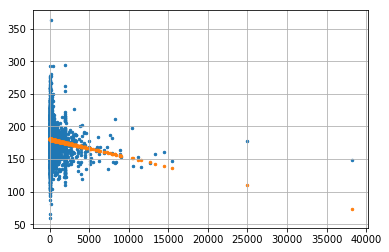

In [22]:
#actual values of X1 plotted against actual values of y
plt.scatter(X1, y, s=6)
#actual values of X1 plotted against predicted values of y
plt.scatter(X1, lr.predict(X1), s=6)
plt.grid()

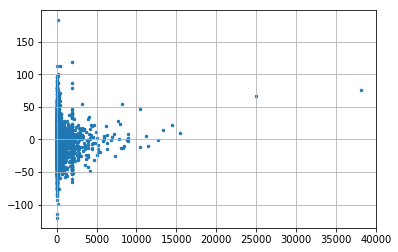

In [23]:
#actual values of X1 plotted against residuals, ie actual values of y minus the predicted values of y, ie error
plt.scatter(X1, y - lr.predict(X1), s=6)
plt.grid()

In [24]:
X1.shape

(3047, 1)

In [25]:
dfx = pd.DataFrame(X1)
dfx.head()

,0
0,143.0
1,323.0
2,221.0
3,1757.0
4,51.0


In [26]:
dfx['avgAnnCount_log'] = np.log(X1)

In [27]:
dfx.head()

,0,avgAnnCount_log
0,143.0,4.962845
1,323.0,5.777652
2,221.0,5.398163
3,1757.0,7.471363
4,51.0,3.931826


In [28]:
lr.fit(dfx, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lr.score(dfx, y)

0.020620849982131317

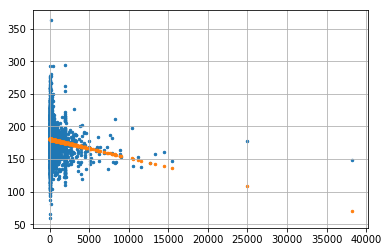

In [30]:
plt.scatter(X1, y, s=6) 
plt.scatter(X1, lr.predict(dfx), s=6)
plt.grid()

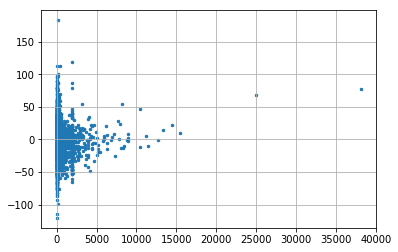

In [31]:
plt.scatter(X1, y - lr.predict(dfx), s=6)
plt.grid()

In [32]:
dfx['avgAnnCount_sqrd'] = X1**2

In [33]:
dfx.head()

,0,avgAnnCount_log,avgAnnCount_sqrd
0,143.0,4.962845,20449.0
1,323.0,5.777652,104329.0
2,221.0,5.398163,48841.0
3,1757.0,7.471363,3087049.0
4,51.0,3.931826,2601.0


In [34]:
lr.fit(dfx, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
lr.score(dfx, y)

0.033821081873621206

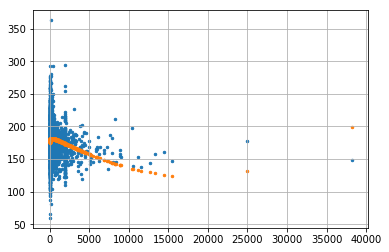

In [36]:
plt.scatter(X1, y, s=6) 
plt.scatter(X1, lr.predict(dfx), s=6)
plt.grid()

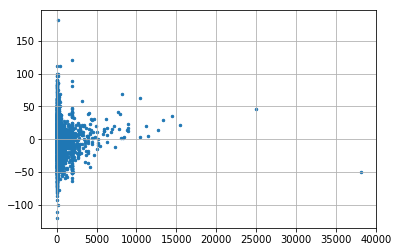

In [37]:
plt.scatter(X1, y - lr.predict(dfx), s=6)
plt.grid()

In [38]:
X['avgAnnCount_log'] = np.log(X['avgAnnCount'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lr.score(X_test, y_test)

0.5525873022987982

Decrease in accuracy with logarithmic version of 'avgAnnCount', so it is dropped from X.

In [42]:
X = X.drop(columns = 'avgAnnCount_log')

In [43]:
X['avgAnnCount_sqrd'] = X['avgAnnCount']**2

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lr.score(X_test, y_test)

0.5527881532030618

There is an increase in accuracy when the squared version of 'avgAnnCount' is added, so the squared version is added to the core feature set.

In [47]:
cancer['avgAnnCount_sqrd'] = cancer['avgAnnCount']**2

## incidenceRate: Mean per capita (100,000) cancer diagnoses

In [48]:
X2 = np.array(cancer['incidenceRate'])
X2 = X2.reshape(-1, 1)

In [49]:
lr.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lr.score(X2, y)

0.2019888507729628

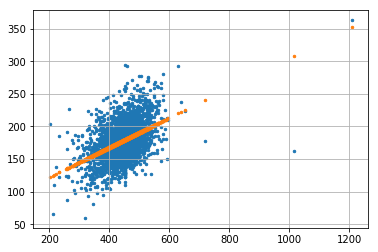

In [51]:
plt.scatter(X2, y, s=6)
plt.scatter(X2, lr.predict(X2), s=6)
plt.grid()

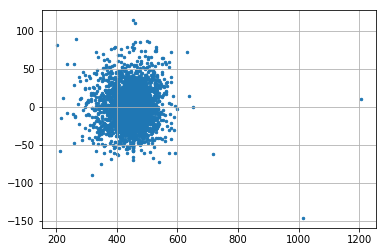

In [52]:
plt.scatter(X2, y - lr.predict(X2), s=6)
plt.grid()

In [53]:
X2.shape

(3047, 1)

In [54]:
dfx2 = pd.DataFrame(X2)
dfx2.head()

,0
0,430.9
1,492.7
2,479.4
3,469.0
4,440.7


In [55]:
dfx2['incidenceRate_log'] = np.log(X2)

In [56]:
dfx2.head()

,0,incidenceRate_log
0,430.9,6.065876
1,492.7,6.199900
2,479.4,6.172535
3,469.0,6.150603
4,440.7,6.088364


In [57]:
lr.fit(dfx2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lr.score(dfx2, y)

0.20201668347941482

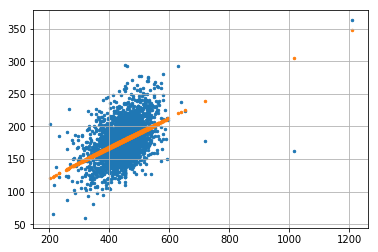

In [59]:
plt.scatter(X2, y, s=6) 
plt.scatter(X2, lr.predict(dfx2), s=6)
plt.grid()

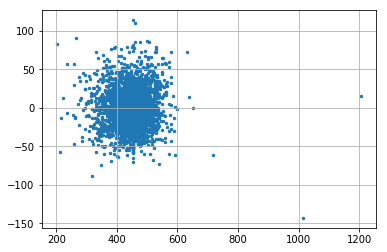

In [60]:
plt.scatter(X2, y - lr.predict(dfx2), s=6)
plt.grid()

In [61]:
dfx2['incidenceRate_sqrd'] = X2**2

In [62]:
dfx2.head()

,0,incidenceRate_log,incidenceRate_sqrd
0,430.9,6.065876,185674.81
1,492.7,6.199900,242753.29
2,479.4,6.172535,229824.36
3,469.0,6.150603,219961.00
4,440.7,6.088364,194216.49


In [63]:
lr.fit(dfx2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lr.score(dfx2, y)

0.20466582499824648

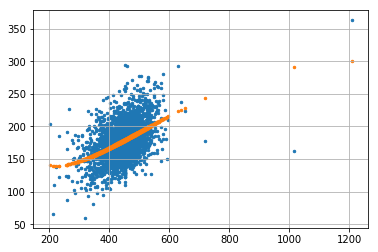

In [65]:
plt.scatter(X2, y, s=6) 
plt.scatter(X2, lr.predict(dfx2), s=6)
plt.grid()

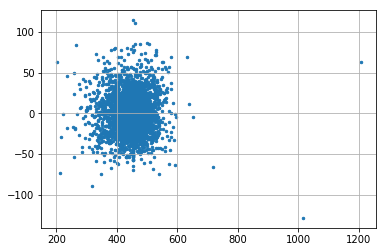

In [66]:
plt.scatter(X2, y - lr.predict(dfx2), s=6)
plt.grid()

In [67]:
X['incidenceRate_log'] = np.log(X['incidenceRate'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
lr.score(X_test, y_test)

0.49911441401244117

Large drop in accuracy, so 'incidenceRate_log' is dropped from X.

In [71]:
X = X.drop(columns = 'incidenceRate_log')

In [72]:
X['incidenceRate_sqrd'] = X['incidenceRate']**2

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
lr.score(X_test, y_test)

0.43767412048125365

Large drop in accuracy with squared version as well, so it is dropped and neither version is added to the core feature set.

In [76]:
X = X.drop(columns = 'incidenceRate_sqrd')

## medIncome: Median Income per County

In [77]:
X3 = np.array(cancer['medIncome'])
X3 = X3.reshape(-1, 1)

In [78]:
lr.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(X3, y)

0.1837107557079959

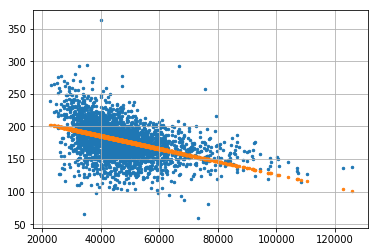

In [80]:
plt.scatter(X3, y, s=6)
plt.scatter(X3, lr.predict(X3), s=6)
plt.grid()
plt.savefig('medIncome_actual_&_predicted_Y.png')

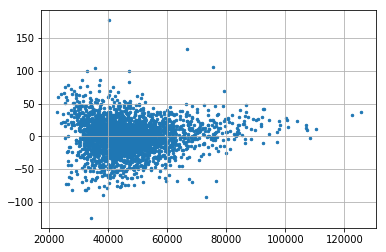

In [81]:
plt.scatter(X3, y - lr.predict(X3), s=6)
plt.grid()
plt.savefig('medIncome_actual_&_residuals.png')

In [82]:
X3.shape

(3047, 1)

In [83]:
dfx3 = pd.DataFrame(X3)
dfx3.head()

,0
0,35525
1,40269
2,38390
3,57908
4,48216


In [84]:
dfx3['medIncome_log'] = np.log(X3)

In [85]:
dfx3.head()

,0,medIncome_log
0,35525,10.477992
1,40269,10.603337
2,38390,10.555552
3,57908,10.966611
4,48216,10.783446


In [86]:
lr.fit(dfx3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
lr.score(dfx3, y)

0.21097891111530487

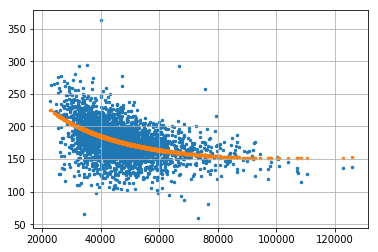

In [88]:
plt.scatter(X3, y, s=6) 
plt.scatter(X3, lr.predict(dfx3), s=6)
plt.grid()

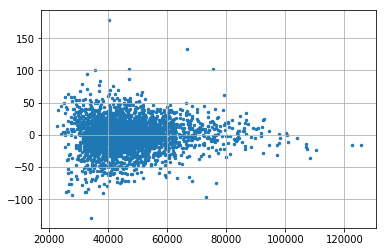

In [89]:
plt.scatter(X3, y - lr.predict(dfx3), s=6)
plt.grid()

In [90]:
dfx3['medIncome_sqrd'] = X3**2

In [91]:
dfx3.head()

,0,medIncome_log,medIncome_sqrd
0,35525,10.477992,1262025625
1,40269,10.603337,1621592361
2,38390,10.555552,1473792100
3,57908,10.966611,3353336464
4,48216,10.783446,2324782656


In [92]:
lr.fit(dfx3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
lr.score(dfx3, y)

0.21244559088909876

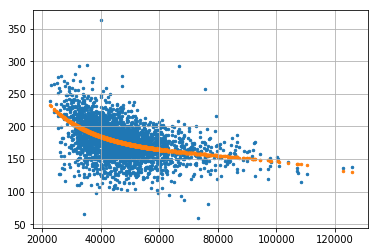

In [94]:
plt.scatter(X3, y, s=6) 
plt.scatter(X3, lr.predict(dfx3), s=6)
plt.grid()
plt.savefig('medIncome_squared_actual_&_predicted_Y.png')

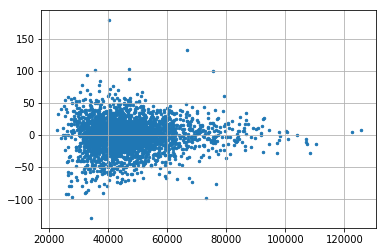

In [95]:
plt.scatter(X3, y - lr.predict(dfx3), s=6)
plt.grid()
plt.savefig('medIncome_squared_actual_&_residuals.png')

In [96]:
X['medIncome_log'] = np.log(X['medIncome'])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
lr.score(X_test, y_test)

0.5527399017835432

There is a decrease in accuracy, so 'medIncome_log' is dropped from X.

In [100]:
X = X.drop(columns = 'medIncome_log')

In [101]:
X['medIncome_sqrd'] = X['medIncome']**2

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
lr.score(X_test, y_test)

0.5537172594197997

There is an increase in accuracy with the squared version of 'medIncome', so it is added to the core feature set.

In [105]:
cancer['medIncome_sqrd'] = cancer['medIncome']**2

## popEst2015: Population of county

In [106]:
X4 = np.array(cancer['popEst2015'])
X4 = X4.reshape(-1, 1)

In [107]:
lr.fit(X4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
lr.score(X4, y)

0.01441754831973674

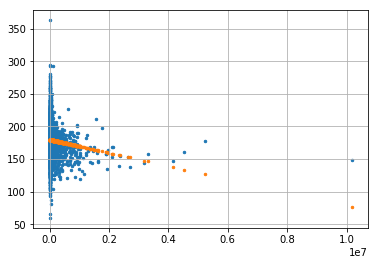

In [109]:
plt.scatter(X4, y, s=6)
plt.scatter(X4, lr.predict(X4), s=6)
plt.grid()

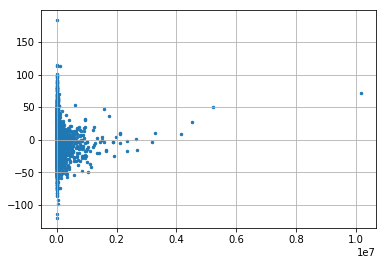

In [110]:
plt.scatter(X4, y - lr.predict(X4), s=6)
plt.grid()

In [111]:
X4.shape

(3047, 1)

In [112]:
dfx4 = pd.DataFrame(X4)
dfx4.head()

,0
0,24932
1,62577
2,32973
3,434211
4,7228


In [113]:
dfx4['popEst2015_log'] = np.log(X4)

In [114]:
dfx4.head()

,0,popEst2015_log
0,24932,10.123907
1,62577,11.044153
2,32973,10.403444
3,434211,12.981286
4,7228,8.885718


In [115]:
lr.fit(dfx4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
lr.score(dfx4, y)

0.01443362040346774

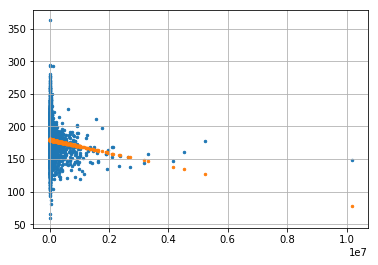

In [117]:
plt.scatter(X4, y, s=6) 
plt.scatter(X4, lr.predict(dfx4), s=6)
plt.grid()

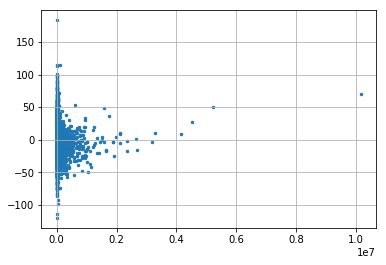

In [118]:
plt.scatter(X4, y - lr.predict(dfx4), s=6)
plt.grid()

In [119]:
dfx4['popEst2015_sqrd'] = X4**2

In [120]:
dfx4.head()

,0,popEst2015_log,popEst2015_sqrd
0,24932,10.123907,621604624
1,62577,11.044153,3915880929
2,32973,10.403444,1087218729
3,434211,12.981286,188539192521
4,7228,8.885718,52243984


In [121]:
lr.fit(dfx4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
lr.score(dfx4, y)

0.0230089749734107

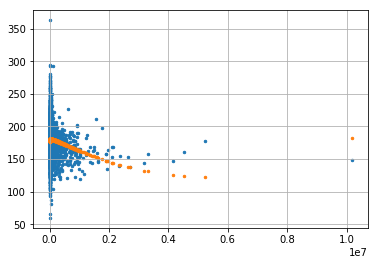

In [123]:
plt.scatter(X4, y, s=6) 
plt.scatter(X4, lr.predict(dfx4), s=6)
plt.grid()

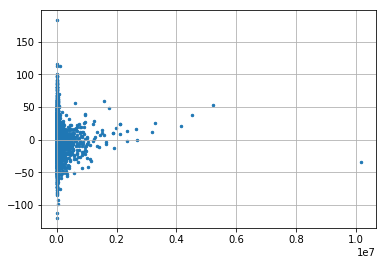

In [124]:
plt.scatter(X4, y - lr.predict(dfx4), s=6)
plt.grid()

In [125]:
X['popEst2015_log'] = np.log(X['popEst2015'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
lr.score(X_test, y_test)

0.5520597080396384

There is a decrease in accuracy, so 'popEst2015_log' is dropped from X.

In [129]:
X = X.drop(columns = 'popEst2015_log')

In [130]:
X['popEst2015_sqrd'] = X['popEst2015']**2

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
lr.score(X_test, y_test)

0.5550764774397401

The squared version increased the accuracy, so it is added to the core feature set.

In [134]:
cancer['popEst2015_sqrd'] = cancer['popEst2015']**2

## povertyPercent: Percent of populace in poverty

In [135]:
X5 = np.array(cancer['povertyPercent'])
X5 = X5.reshape(-1, 1)

In [136]:
lr.fit(X5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
lr.score(X5, y)

0.1843748963656746

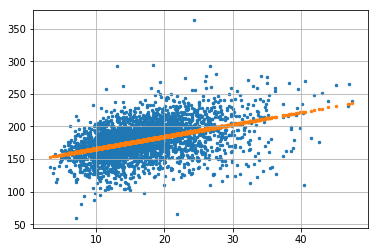

In [138]:
plt.scatter(X5, y, s=6)
plt.scatter(X5, lr.predict(X5), s=6)
plt.grid()

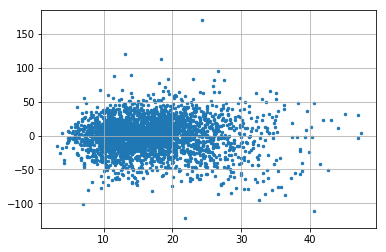

In [139]:
plt.scatter(X5, y - lr.predict(X5), s=6)
plt.grid()

In [140]:
X5.shape

(3047, 1)

In [141]:
dfx5 = pd.DataFrame(X5)
dfx5.head()

,0
0,21.4
1,22.0
2,19.4
3,11.6
4,10.3


In [142]:
dfx5['povertyPercent_log'] = np.log(X5)

In [143]:
dfx5.head()

,0,povertyPercent_log
0,21.4,3.063391
1,22.0,3.091042
2,19.4,2.965273
3,11.6,2.451005
4,10.3,2.332144


In [144]:
lr.fit(dfx5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
lr.score(dfx5, y)

0.19221642730863686

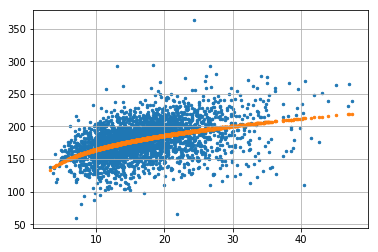

In [146]:
plt.scatter(X5, y, s=6) 
plt.scatter(X5, lr.predict(dfx5), s=6)
plt.grid()

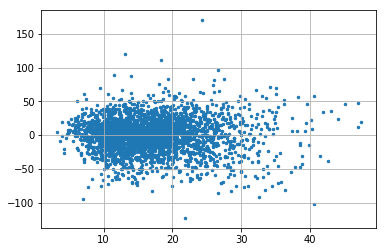

In [147]:
plt.scatter(X5, y - lr.predict(dfx5), s=6)
plt.grid()

In [148]:
dfx5['povertyPercent_sqrd'] = X5**2

In [149]:
dfx5.head()

,0,povertyPercent_log,povertyPercent_sqrd
0,21.4,3.063391,457.96
1,22.0,3.091042,484.00
2,19.4,2.965273,376.36
3,11.6,2.451005,134.56
4,10.3,2.332144,106.09


In [150]:
lr.fit(dfx5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
lr.score(dfx5, y)

0.1924632719740763

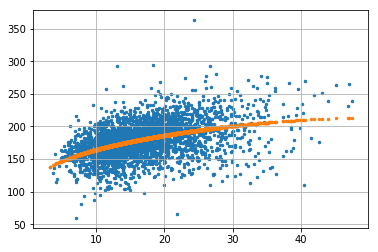

In [152]:
plt.scatter(X5, y, s=6) 
plt.scatter(X5, lr.predict(dfx5), s=6)
plt.grid()

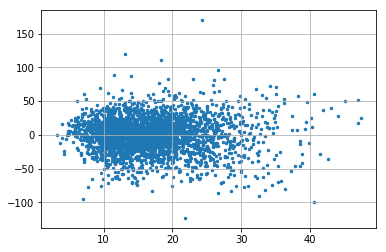

In [153]:
plt.scatter(X5, y - lr.predict(dfx5), s=6)
plt.grid()

In [154]:
X['povertyPercent_log'] = np.log(X['povertyPercent'])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
lr.score(X_test, y_test)

0.5552416302845873

The logarithmic version of the 'povertyPercent' feature increased accuracy, so it is added to the core feature set.

In [158]:
cancer['povertyPercent_log'] = np.log(cancer['povertyPercent'])

In [159]:
X['povertyPercent_sqrd'] = X['povertyPercent']**2

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
lr.score(X_test, y_test)

0.55276207404519

The squared version of the 'povertyPercent' feature results in a decreased accuracy, so it is dropped from X.

In [163]:
X = X.drop(columns = 'povertyPercent_sqrd')

## studyPerCap: Per capita number of cancer-related clinical trials per county

In [164]:
X6 = np.array(cancer['studyPerCap'])
X6 = X6.reshape(-1, 1)

In [165]:
lr.fit(X6, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
lr.score(X6, y)

0.0004966217051250998

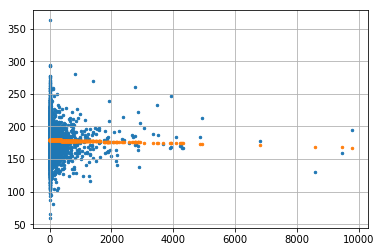

In [167]:
plt.scatter(X6, y, s=6)
plt.scatter(X6, lr.predict(X6), s=6)
plt.grid()

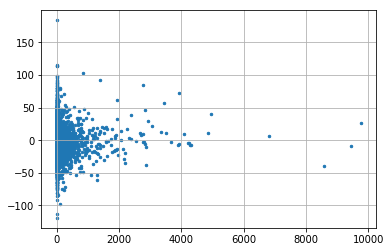

In [168]:
plt.scatter(X6, y - lr.predict(X6), s=6)
plt.grid()

In [169]:
X6.shape

(3047, 1)

In [170]:
dfx6 = pd.DataFrame(X6)
dfx6.head()

,0
0,0.000000
1,0.000000
2,0.000000
3,414.545002
4,138.350858


As there are zero values in 'studyPerCap', a log version can't be made.

In [171]:
dfx6['studyPerCap_sqrd'] = X6**2

In [172]:
dfx6.head()

,0,studyPerCap_sqrd
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,414.545002,171847.558932
4,138.350858,19140.959854


In [173]:
lr.fit(dfx6, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
lr.score(dfx6, y)

0.0008653117137387145

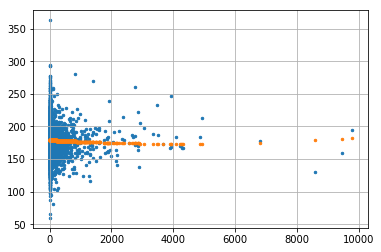

In [175]:
plt.scatter(X6, y, s=6) 
plt.scatter(X6, lr.predict(dfx6), s=6)
plt.grid()

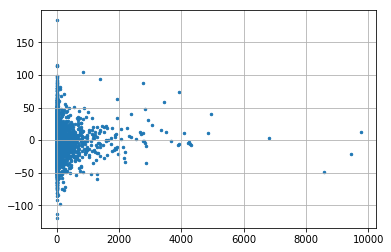

In [176]:
plt.scatter(X6, y - lr.predict(dfx6), s=6)
plt.grid()

In [177]:
X['studyPerCap_sqrd'] = X['studyPerCap']**2

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
lr.score(X_test, y_test)

0.5556244495937801

The squared version of the 'studyPerCap' feature results in a higher accuracy score, so it is added to the core feature set.

In [181]:
cancer['studyPerCap_sqrd'] = cancer['studyPerCap']**2

## MedianAge: Median age of county residents

In [182]:
X7 = np.array(cancer['MedianAge'])
X7 = X7.reshape(-1, 1)

In [183]:
lr.fit(X7, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
lr.score(X7, y)

1.802300311537497e-05

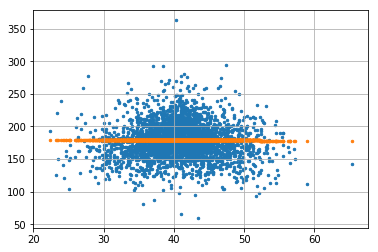

In [185]:
plt.scatter(X7, y, s=6)
plt.scatter(X7, lr.predict(X7), s=6)
plt.grid()

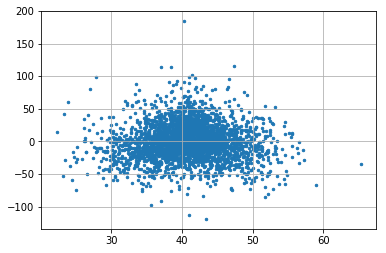

In [186]:
plt.scatter(X7, y - lr.predict(X7), s=6)
plt.grid()

In [187]:
X7.shape

(3047, 1)

In [188]:
dfx7 = pd.DataFrame(X7)
dfx7.head()

,0
0,43.3
1,35.7
2,45.3
3,35.8
4,45.9


In [189]:
dfx7['MedianAge_log'] = np.log(X7)

In [190]:
dfx7.head()

,0,MedianAge_log
0,43.3,3.768153
1,35.7,3.575151
2,45.3,3.813307
3,35.8,3.577948
4,45.9,3.826465


In [191]:
lr.fit(dfx7, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
lr.score(dfx7, y)

0.031746455929645645

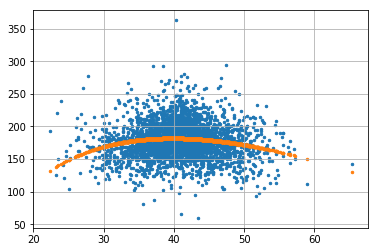

In [193]:
plt.scatter(X7, y, s=6) 
plt.scatter(X7, lr.predict(dfx7), s=6)
plt.grid()

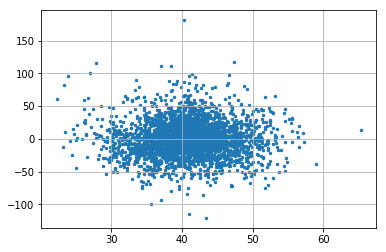

In [194]:
plt.scatter(X7, y - lr.predict(dfx7), s=6)
plt.grid()

In [195]:
dfx7['MedianAge_sqrd'] = X7**2

In [196]:
dfx7.head()

,0,MedianAge_log,MedianAge_sqrd
0,43.3,3.768153,1874.89
1,35.7,3.575151,1274.49
2,45.3,3.813307,2052.09
3,35.8,3.577948,1281.64
4,45.9,3.826465,2106.81


In [197]:
lr.fit(dfx7, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
lr.score(dfx7, y)

0.03678331275517255

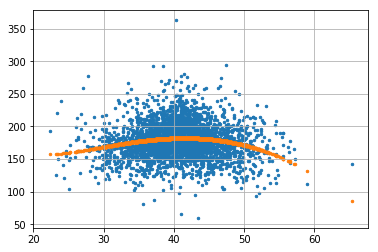

In [199]:
plt.scatter(X7, y, s=6) 
plt.scatter(X7, lr.predict(dfx7), s=6)
plt.grid()

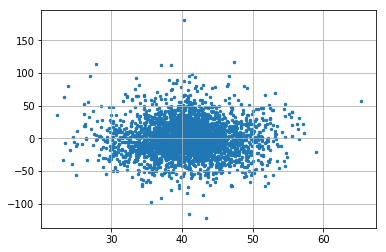

In [200]:
plt.scatter(X7, y - lr.predict(dfx7), s=6)
plt.grid()

In [201]:
X['MedianAge_log'] = np.log(X['MedianAge'])

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [204]:
lr.score(X_test, y_test)

0.5561214390937799

There is an increase in accuracy, so it is added to the core feature set.

In [205]:
cancer['MedianAge_log'] = np.log(cancer['MedianAge'])

In [206]:
X['MedianAge_sqrd'] = X['MedianAge']**2

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [209]:
lr.score(X_test, y_test)

0.5459295822945371

There is a decrease in accuracy, so it is dropped from X.

In [210]:
X = X.drop(columns = 'MedianAge_sqrd')

## MedianAgeMale: Median Age of male county residents

In [211]:
X8 = np.array(cancer['MedianAgeMale'])
X8 = X8.reshape(-1, 1)

In [212]:
lr.fit(X8, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
lr.score(X8, y)

0.0004808998596264047

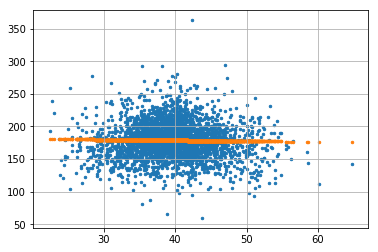

In [214]:
plt.scatter(X8, y, s=6)
plt.scatter(X8, lr.predict(X8), s=6)
plt.grid()

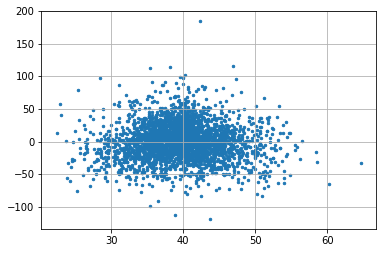

In [215]:
plt.scatter(X8, y - lr.predict(X8), s=6)
plt.grid()

In [216]:
X8.shape

(3047, 1)

In [217]:
dfx8 = pd.DataFrame(X8)
dfx8.head()

,0
0,40.7
1,34.7
2,42.7
3,35.0
4,45.0


In [218]:
dfx8['MedianAgeMale_log'] = np.log(X8)

In [219]:
dfx8.head()

,0,MedianAgeMale_log
0,40.7,3.706228
1,34.7,3.546740
2,42.7,3.754199
3,35.0,3.555348
4,45.0,3.806662


In [220]:
lr.fit(dfx8, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
lr.score(dfx8, y)

0.026646241853180097

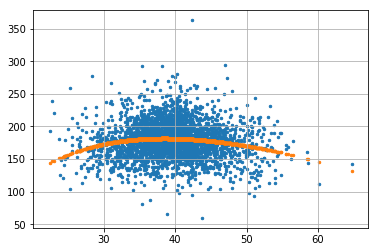

In [222]:
plt.scatter(X8, y, s=6) 
plt.scatter(X8, lr.predict(dfx8), s=6)
plt.grid()

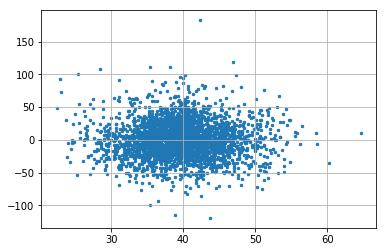

In [223]:
plt.scatter(X8, y - lr.predict(dfx8), s=6)
plt.grid()

In [224]:
dfx8['MedianAgeMale_sqrd'] = X8**2

In [225]:
dfx8.head()

,0,MedianAgeMale_log,MedianAgeMale_sqrd
0,40.7,3.706228,1656.49
1,34.7,3.546740,1204.09
2,42.7,3.754199,1823.29
3,35.0,3.555348,1225.00
4,45.0,3.806662,2025.00


In [226]:
lr.fit(dfx8, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [227]:
lr.score(dfx8, y)

0.028616613403559255

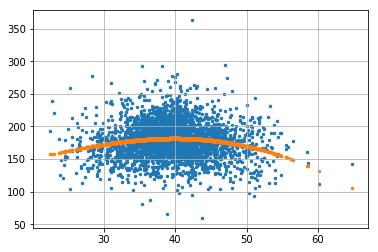

In [228]:
plt.scatter(X8, y, s=6) 
plt.scatter(X8, lr.predict(dfx8), s=6)
plt.grid()

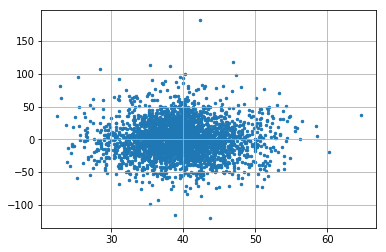

In [229]:
plt.scatter(X8, y - lr.predict(dfx8), s=6)
plt.grid()

In [230]:
X['MedianAgeMale_log'] = np.log(X['MedianAgeMale'])

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [233]:
lr.score(X_test, y_test)

0.555150209495732

The logarithmic version of 'MedianAgeMale' resulted in a loss of accuracy, so it is dropped from X.

In [234]:
X = X.drop(columns = 'MedianAgeMale_log')

In [235]:
X['MedianAgeMale_sqrd'] = X['MedianAgeMale']**2

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [238]:
lr.score(X_test, y_test)

0.5535140227482432

The squared version again reduced the accuracy. It is dropped from X.

In [239]:
X = X.drop(columns = 'MedianAgeMale_sqrd')

## MedianAgeFemale: Median age of female county residents

In [240]:
X9 = np.array(cancer['MedianAgeFemale'])
X9 = X9.reshape(-1, 1)

In [241]:
lr.fit(X9, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [242]:
lr.score(X9, y)

0.0001451636043615645

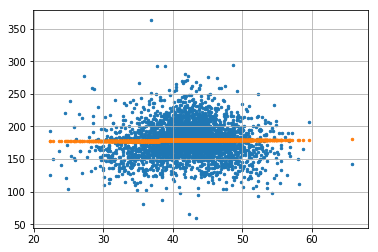

In [243]:
plt.scatter(X9, y, s=6)
plt.scatter(X9, lr.predict(X9), s=6)
plt.grid()

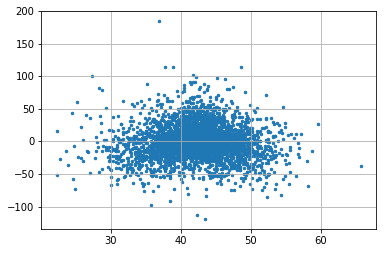

In [244]:
plt.scatter(X9, y - lr.predict(X9), s=6)
plt.grid()

In [245]:
X9.shape

(3047, 1)

In [246]:
dfx9 = pd.DataFrame(X9)
dfx9.head()

,0
0,44.9
1,37.2
2,47.3
3,36.6
4,47.7


In [247]:
dfx9['MedianAgeFemale_log'] = np.log(X9)

In [248]:
dfx9.head()

,0,MedianAgeFemale_log
0,44.9,3.804438
1,37.2,3.616309
2,47.3,3.856510
3,36.6,3.600048
4,47.7,3.864931


In [249]:
lr.fit(dfx9, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [250]:
lr.score(dfx9, y)

0.030555018802900572

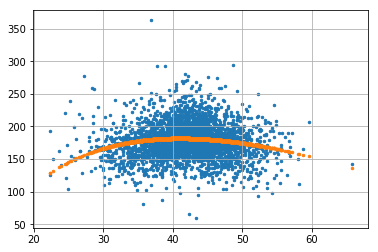

In [251]:
plt.scatter(X9, y, s=6) 
plt.scatter(X9, lr.predict(dfx9), s=6)
plt.grid()

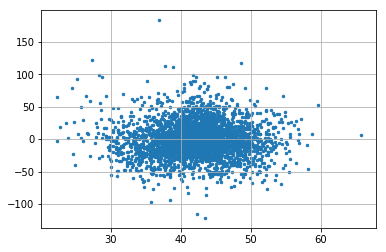

In [252]:
plt.scatter(X9, y - lr.predict(dfx9), s=6)
plt.grid()

In [253]:
dfx9['MedianAgeFemale_sqrd'] = X9**2

In [254]:
dfx9.head()

,0,MedianAgeFemale_log,MedianAgeFemale_sqrd
0,44.9,3.804438,2016.01
1,37.2,3.616309,1383.84
2,47.3,3.856510,2237.29
3,36.6,3.600048,1339.56
4,47.7,3.864931,2275.29


In [255]:
lr.fit(dfx9, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
lr.score(dfx9, y)

0.038394949678502654

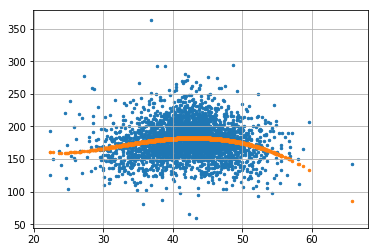

In [257]:
plt.scatter(X9, y, s=6) 
plt.scatter(X9, lr.predict(dfx9), s=6)
plt.grid()

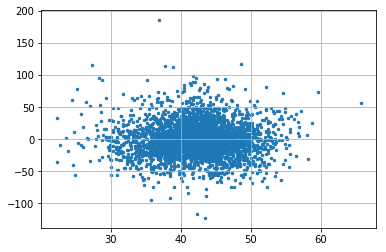

In [258]:
plt.scatter(X9, y - lr.predict(dfx9), s=6)
plt.grid()

In [259]:
X['MedianAgeFemale_log'] = np.log(X['MedianAgeFemale'])

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
lr.score(X_test, y_test)

0.5528068219417434

The logarithmic version of 'MedianAgeFemale' resulted in a decrease of accuracy, so it is dropped from X and will not be added to the core feature set.

In [263]:
X = X.drop(columns = 'MedianAgeFemale_log')

In [264]:
X['MedianAgeFemale_sqrd'] = X['MedianAgeFemale']**2

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [267]:
lr.score(X_test, y_test)

0.5581226430908997

The squared version of the 'MedianAgeFemale' feature resulted in an increase in accuracy, so it is added to the core feature set.

In [268]:
cancer['MedianAgeFemale_sqrd'] = cancer['MedianAgeFemale']**2

## AvgHouseholdSize: Average household size of occupied housing units by tenure

In [269]:
X10 = np.array(cancer['AvgHouseholdSize'])
X10 = X10.reshape(-1, 1)

In [270]:
lr.fit(X10, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [271]:
lr.score(X10, y)

0.0011963889547245143

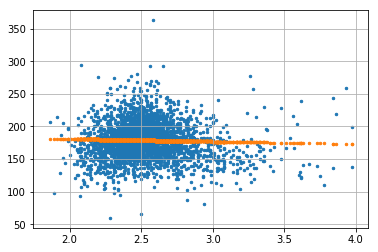

In [272]:
plt.scatter(X10, y, s=6)
plt.scatter(X10, lr.predict(X10), s=6)
plt.grid()

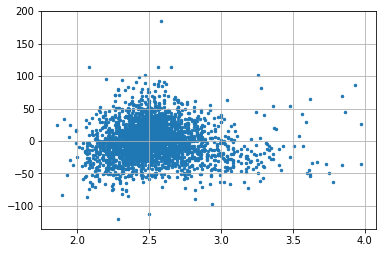

In [273]:
plt.scatter(X10, y - lr.predict(X10), s=6)
plt.grid()

In [274]:
X10.shape

(3047, 1)

In [275]:
dfx10 = pd.DataFrame(X10)
dfx10.head()

,0
0,2.52
1,2.70
2,2.29
3,2.61
4,2.25


In [276]:
dfx10['AvgHouseholdSize_log'] = np.log(X10)

In [277]:
dfx10.head()

,0,AvgHouseholdSize_log
0,2.52,0.924259
1,2.70,0.993252
2,2.29,0.828552
3,2.61,0.959350
4,2.25,0.810930


In [278]:
lr.fit(dfx10, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [279]:
lr.score(dfx10, y)

0.031185065923630018

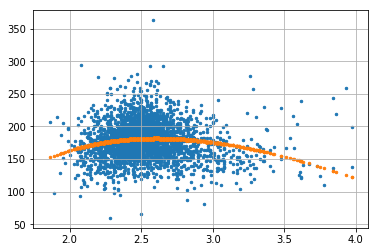

In [280]:
plt.scatter(X10, y, s=6) 
plt.scatter(X10, lr.predict(dfx10), s=6)
plt.grid()

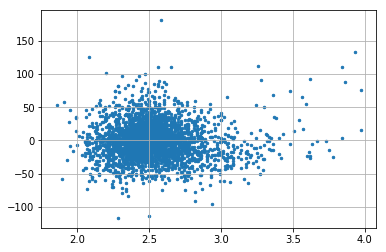

In [281]:
plt.scatter(X10, y - lr.predict(dfx10), s=6)
plt.grid()

In [282]:
dfx10['AvgHouseholdSize_sqrd'] = X10**2

In [283]:
dfx10.head()

,0,AvgHouseholdSize_log,AvgHouseholdSize_sqrd
0,2.52,0.924259,6.3504
1,2.70,0.993252,7.2900
2,2.29,0.828552,5.2441
3,2.61,0.959350,6.8121
4,2.25,0.810930,5.0625


In [284]:
lr.fit(dfx10, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [285]:
lr.score(dfx10, y)

0.0513585004178837

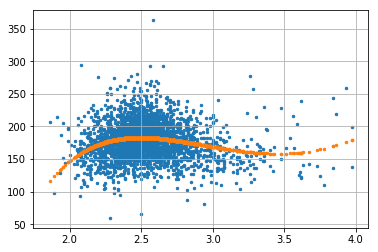

In [286]:
plt.scatter(X10, y, s=6) 
plt.scatter(X10, lr.predict(dfx10), s=6)
plt.grid()

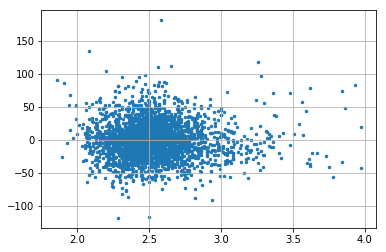

In [287]:
plt.scatter(X10, y - lr.predict(dfx10), s=6)
plt.grid()

In [288]:
X['AvgHouseholdSize_log'] = np.log(X['AvgHouseholdSize'])

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [291]:
lr.score(X_test, y_test)

0.5561205340750461

The log version decreased the accuracy, so it is dropped from X.

In [292]:
X = X.drop(columns = 'AvgHouseholdSize_log')

In [293]:
X['AvgHouseholdSize_sqrd'] = X['AvgHouseholdSize']**2

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [296]:
lr.score(X_test, y_test)

0.5544982243139429

The squared version decreased the accuracy, so it is dropped from X.

In [297]:
X = X.drop(columns = 'AvgHouseholdSize_sqrd')

## 'PercentMarried': Percent of county residents who are married

In [298]:
X11 = np.array(cancer['PercentMarried'])
X11 = X11.reshape(-1, 1)

In [299]:
lr.fit(X11, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
lr.score(X11, y)

0.07119315977091079

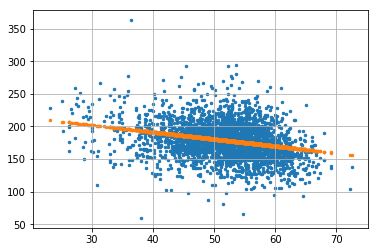

In [301]:
plt.scatter(X11, y, s=6)
plt.scatter(X11, lr.predict(X11), s=6)
plt.grid()

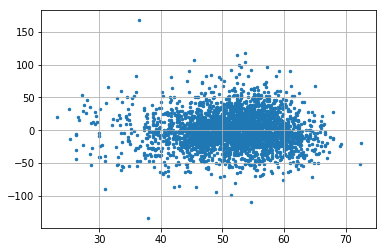

In [302]:
plt.scatter(X11, y - lr.predict(X11), s=6)
plt.grid()

In [303]:
X11.shape

(3047, 1)

In [304]:
dfx11 = pd.DataFrame(X11)
dfx11.head()

,0
0,46.8
1,47.3
2,52.6
3,53.6
4,56.2


In [305]:
dfx11['PercentMarried_log'] = np.log(X11)

In [306]:
dfx11.head()

,0,PercentMarried_log
0,46.8,3.845883
1,47.3,3.856510
2,52.6,3.962716
3,53.6,3.981549
4,56.2,4.028917


In [307]:
lr.fit(dfx11, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [308]:
lr.score(dfx11, y)

0.07501450439510471

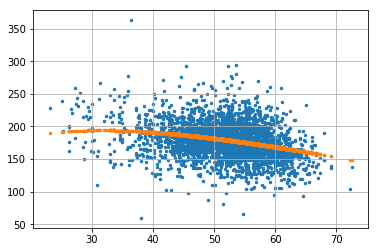

In [309]:
plt.scatter(X11, y, s=6) 
plt.scatter(X11, lr.predict(dfx11), s=6)
plt.grid()

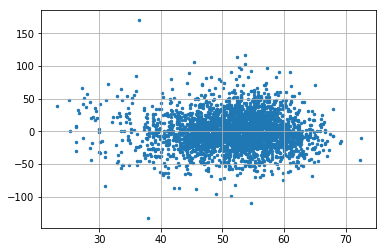

In [310]:
plt.scatter(X11, y - lr.predict(dfx11), s=6)
plt.grid()

In [311]:
dfx11['PercentMarried_sqrd'] = X11**2

In [312]:
dfx11.head()

,0,PercentMarried_log,PercentMarried_sqrd
0,46.8,3.845883,2190.24
1,47.3,3.856510,2237.29
2,52.6,3.962716,2766.76
3,53.6,3.981549,2872.96
4,56.2,4.028917,3158.44


In [313]:
lr.fit(dfx11, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
lr.score(dfx11, y)

0.08943050803256858

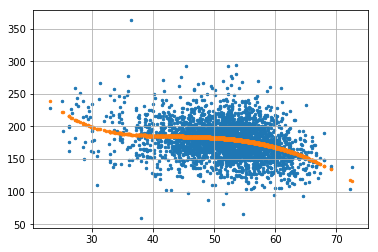

In [315]:
plt.scatter(X11, y, s=6) 
plt.scatter(X11, lr.predict(dfx11), s=6)
plt.grid()

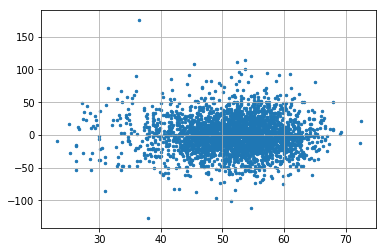

In [316]:
plt.scatter(X11, y - lr.predict(dfx11), s=6)
plt.grid()

In [317]:
X['PercentMarried_log'] = np.log(X['PercentMarried'])

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [319]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [320]:
lr.score(X_test, y_test)

0.5597092127174894

The log version resulted in an increase in accuracy so it is added to the core feature set.

In [321]:
cancer['PercentMarried_log'] = np.log(cancer['PercentMarried'])

In [322]:
X['PercentMarried_sqrd'] = X['PercentMarried']**2

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [325]:
lr.score(X_test, y_test)

0.5577184082012226

The squared version decreased the accuracy, so it is dropped from X.

In [326]:
X = X.drop(columns = 'PercentMarried_sqrd')

## 'PctNoHS18_24': Percent of county residents ages 18-24 highest education attained: less than high school

In [327]:
X12 = np.array(cancer['PctNoHS18_24'])
X12 = X12.reshape(-1, 1)

In [328]:
lr.fit(X12, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [329]:
lr.score(X12, y)

0.007825633375483587

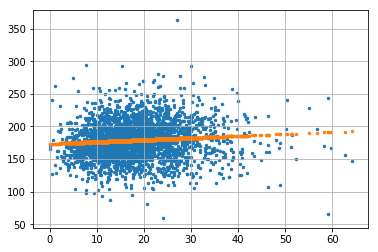

In [330]:
plt.scatter(X12, y, s=6)
plt.scatter(X12, lr.predict(X12), s=6)
plt.grid()

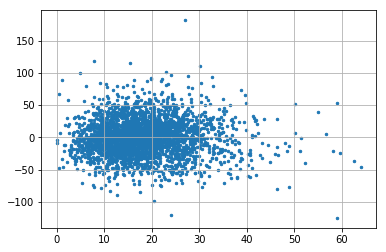

In [331]:
plt.scatter(X12, y - lr.predict(X12), s=6)
plt.grid()

In [332]:
X12.shape

(3047, 1)

In [333]:
dfx12 = pd.DataFrame(X12)
dfx12.head()

,0
0,11.2
1,24.6
2,26.6
3,10.4
4,8.6


The 'PctNoHS18_24' column has zero values, so a log version is not possible.

In [334]:
dfx12['PctNoHS18_24_sqrd'] = X12**2

In [335]:
dfx12.head()

,0,PctNoHS18_24_sqrd
0,11.2,125.44
1,24.6,605.16
2,26.6,707.56
3,10.4,108.16
4,8.6,73.96


In [336]:
lr.fit(dfx12, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [337]:
lr.score(dfx12, y)

0.01700219107640022

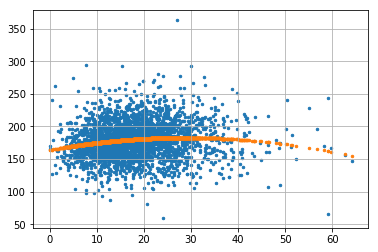

In [338]:
plt.scatter(X12, y, s=6) 
plt.scatter(X12, lr.predict(dfx12), s=6)
plt.grid()

In [339]:
X['PctNoHS18_24_sqrd'] = X['PctNoHS18_24']**2

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [342]:
lr.score(X_test, y_test)

0.5562594049024847

The squared version results in a decrease in accuracy, so it is dropped from X.

In [343]:
X = X.drop(columns = 'PctNoHS18_24_sqrd')

## 'PctHS18_24': Percent of county residents ages 18-24 highest education attained: high school diploma

In [344]:
X13 = np.array(cancer['PctHS18_24'])
X13 = X13.reshape(-1, 1)

In [345]:
lr.fit(X13, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [346]:
lr.score(X13, y)

0.06863139328883205

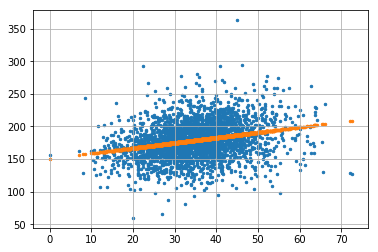

In [347]:
plt.scatter(X13, y, s=6)
plt.scatter(X13, lr.predict(X13), s=6)
plt.grid()

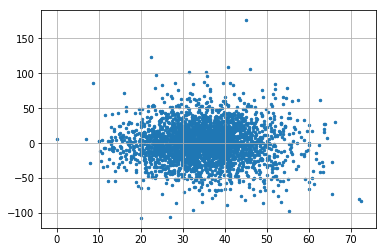

In [348]:
plt.scatter(X13, y - lr.predict(X13), s=6)
plt.grid()

In [349]:
X13.shape

(3047, 1)

In [350]:
dfx13 = pd.DataFrame(X13)
dfx13.head()

,0
0,40.0
1,35.9
2,40.4
3,30.1
4,46.1


The 'PctHS18_24' column has zero values, so a log version is not possible.

In [351]:
dfx13['PctHS18_24_sqrd'] = X13**2

In [352]:
dfx13.head()

,0,PctHS18_24_sqrd
0,40.0,1600.00
1,35.9,1288.81
2,40.4,1632.16
3,30.1,906.01
4,46.1,2125.21


In [353]:
lr.fit(dfx13, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [354]:
lr.score(dfx13, y)

0.07201848003601341

In [355]:
X['PctHS18_24_sqrd'] = X['PctHS18_24']**2

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [357]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [358]:
lr.score(X_test, y_test)

0.5526776023379494

There is a decrease in accuracy, so it is dropped from X.

In [359]:
X = X.drop(columns = 'PctHS18_24_sqrd')

## 'PctSomeCol18_24': Percent of county residents ages 18-24 highest education attained: some college

In [360]:
X14 = np.array(cancer['PctSomeCol18_24'])
X14 = X14.reshape(-1, 1)

In [361]:
lr.fit(X14, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [362]:
lr.score(X14, y)

0.009006282122200115

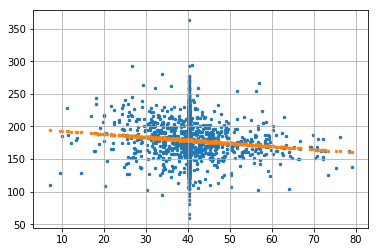

In [363]:
plt.scatter(X14, y, s=6)
plt.scatter(X14, lr.predict(X14), s=6)
plt.grid()

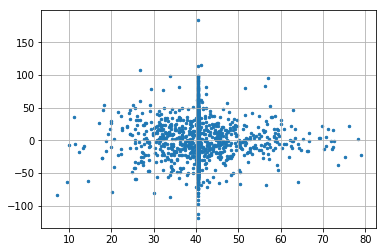

In [364]:
plt.scatter(X14, y - lr.predict(X14), s=6)
plt.grid()

In [365]:
X14.shape

(3047, 1)

In [366]:
dfx14 = pd.DataFrame(X14)
dfx14.head()

,0
0,40.4
1,36.6
2,40.4
3,48.1
4,40.4


In [367]:
dfx14['PctSomeCol18_24_log'] = np.log(X14)

In [368]:
dfx14.head()

,0,PctSomeCol18_24_log
0,40.4,3.698830
1,36.6,3.600048
2,40.4,3.698830
3,48.1,3.873282
4,40.4,3.698830


In [369]:
lr.fit(dfx14, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [370]:
lr.score(dfx14, y)

0.010048462111071021

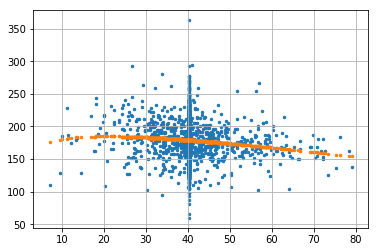

In [371]:
plt.scatter(X14, y, s=6) 
plt.scatter(X14, lr.predict(dfx14), s=6)
plt.grid()

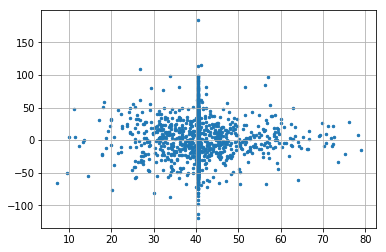

In [372]:
plt.scatter(X14, y - lr.predict(dfx14), s=6)
plt.grid()

In [373]:
dfx14['PctSomeCol18_24_sqrd'] = X14**2

In [374]:
dfx14.head()

,0,PctSomeCol18_24_log,PctSomeCol18_24_sqrd
0,40.4,3.698830,1632.16
1,36.6,3.600048,1339.56
2,40.4,3.698830,1632.16
3,48.1,3.873282,2313.61
4,40.4,3.698830,1632.16


In [375]:
lr.fit(dfx14, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [376]:
lr.score(dfx14, y)

0.011608669062523003

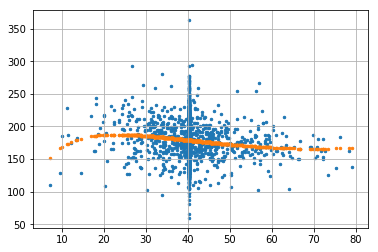

In [377]:
plt.scatter(X14, y, s=6) 
plt.scatter(X14, lr.predict(dfx14), s=6)
plt.grid()

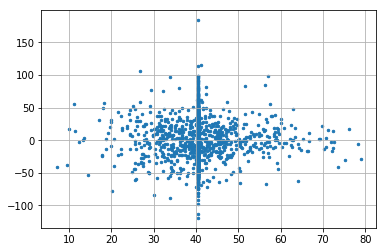

In [378]:
plt.scatter(X14, y - lr.predict(dfx14), s=6)
plt.grid()

In [379]:
X['PctSomeCol18_24_log'] = np.log(X['PctSomeCol18_24'])

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [381]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [382]:
lr.score(X_test, y_test)

0.5543222563038541

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [383]:
X = X.drop(columns = 'PctSomeCol18_24_log')

In [384]:
X['PctSomeCol18_24_sqrd'] = X['PctSomeCol18_24']**2

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [386]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [387]:
lr.score(X_test, y_test)

0.5557714928953088

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [388]:
X = X.drop(columns = 'PctSomeCol18_24_sqrd')

## 'PctBachDeg18_24': Percent of county residents ages 18-24 highest education attained: bachelor's degree 

In [389]:
X15 = np.array(cancer['PctBachDeg18_24'])
X15 = X15.reshape(-1, 1)

In [390]:
lr.fit(X15, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [391]:
lr.score(X15, y)

0.08283886159550735

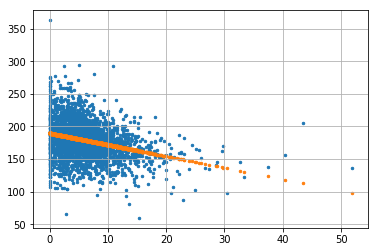

In [392]:
plt.scatter(X15, y, s=6)
plt.scatter(X15, lr.predict(X15), s=6)
plt.grid()

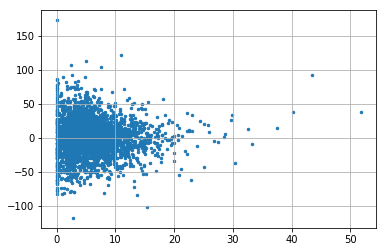

In [393]:
plt.scatter(X15, y - lr.predict(X15), s=6)
plt.grid()

In [394]:
X15.shape

(3047, 1)

In [395]:
dfx15 = pd.DataFrame(X15)
dfx15.head()

,0
0,3.2
1,2.9
2,12.9
3,11.4
4,11.5


In [396]:
dfx15['PctBachDeg18_24_sqrd'] = X15**2

In [397]:
dfx15.head()

,0,PctBachDeg18_24_sqrd
0,3.2,10.24
1,2.9,8.41
2,12.9,166.41
3,11.4,129.96
4,11.5,132.25


In [398]:
lr.fit(dfx15, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [399]:
lr.score(dfx15, y)

0.08491965740592422

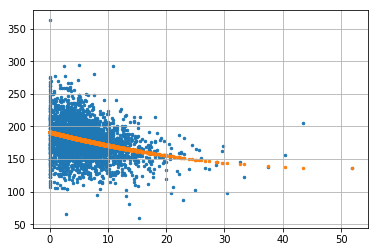

In [400]:
plt.scatter(X15, y, s=6) 
plt.scatter(X15, lr.predict(dfx15), s=6)
plt.grid()

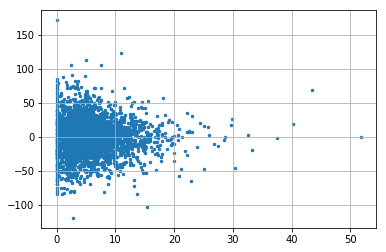

In [401]:
plt.scatter(X15, y - lr.predict(dfx15), s=6)
plt.grid()

In [402]:
X['PctBachDeg18_24_sqrd'] = X['PctBachDeg18_24']**2

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [404]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [405]:
lr.score(X_test, y_test)

0.5565952326009954

There is a decrease in accuracy with the squared version, so it is dropped from X.

In [406]:
X = X.drop(columns = 'PctBachDeg18_24_sqrd')

In [407]:
cancer.to_csv('cancer_ml3.csv')

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [409]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [410]:
lr.score(X_test, y_test)

0.5597092127174894